In [1]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

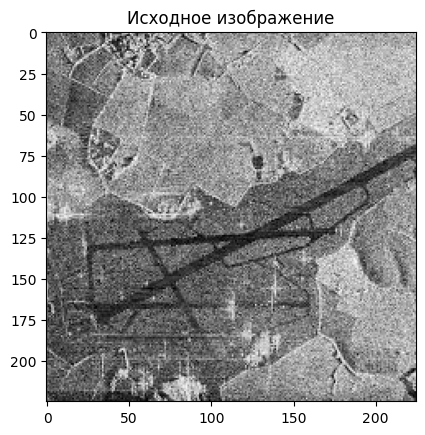

In [2]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

In [3]:
import copy
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

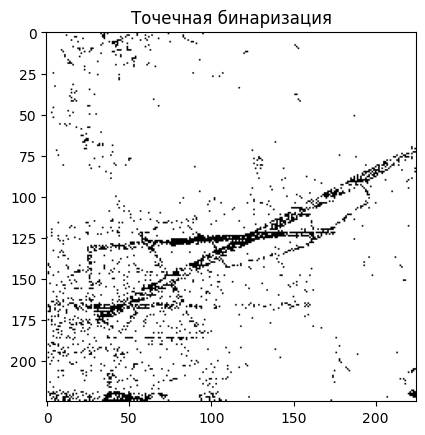

In [4]:
plt.imshow(bin_img, cmap="gray")
plt.title("Точечная бинаризация")
plt.show()

Длина максимального участка дороги: 248.29418035870273


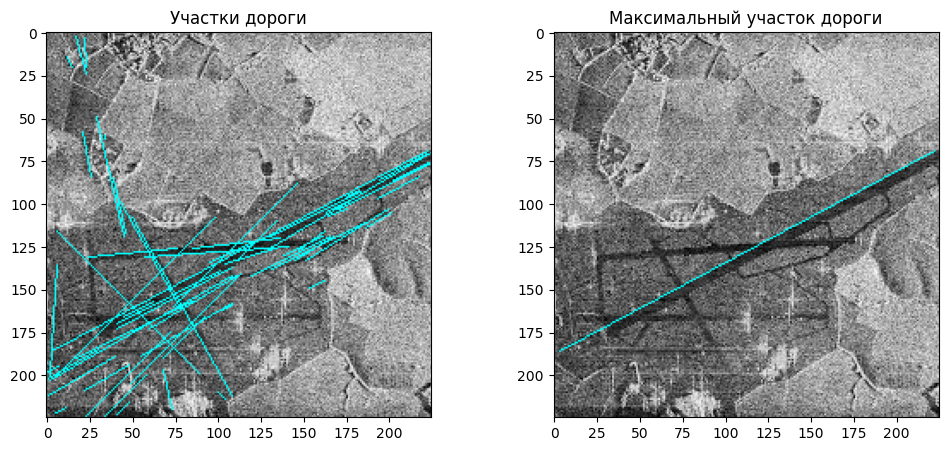

In [5]:
imageLine = image.copy()
imageOneLine = image.copy()
edges = cv2.Canny(bin_img, 0, 1, apertureSize=3)
minLineLength = 10
tlines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength, maxLineGap=8)
maxLineLength = 0
if tlines is not None:
    for i in range(len(tlines)):
        x1, y1, x2, y2 = tlines[i][0]
        cv2.line(imageLine, (x1, y1), (x2, y2), (255, 255, 0), 1)
        tlen = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if tlen > maxLineLength:
            maxLineLength = tlen
            xm1, ym1, xm2, ym2 = tlines[i][0]
    cv2.line(imageOneLine, (xm1, ym1), (xm2, ym2), (255, 255, 0), 1)
    print(f"Длина максимального участка дороги: {maxLineLength}")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imageLine, cv2.COLOR_BGR2RGB))
    plt.title("Участки дороги")
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imageOneLine, cv2.COLOR_BGR2RGB))
    plt.title("Максимальный участок дороги")
    plt.show()
else:
    print("Линии не обнаружены.")

In [6]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

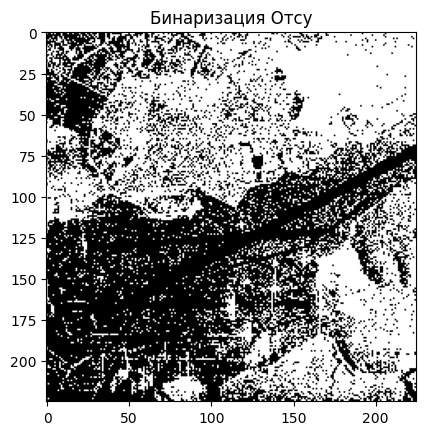

In [7]:
plt.imshow(th2, cmap = "gray")
plt.title("Бинаризация Отсу")
plt.show()

In [8]:
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,71,21)

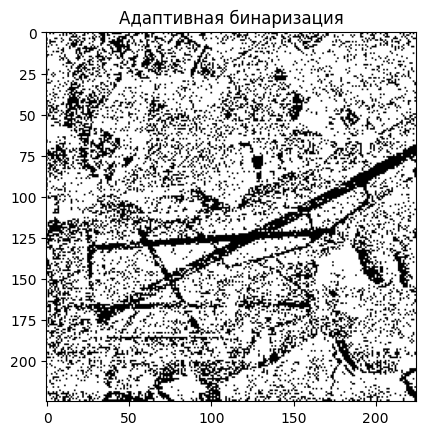

In [9]:
plt.imshow(th3, cmap = "gray")
plt.title("Адаптивная бинаризация")
plt.show()

In [10]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

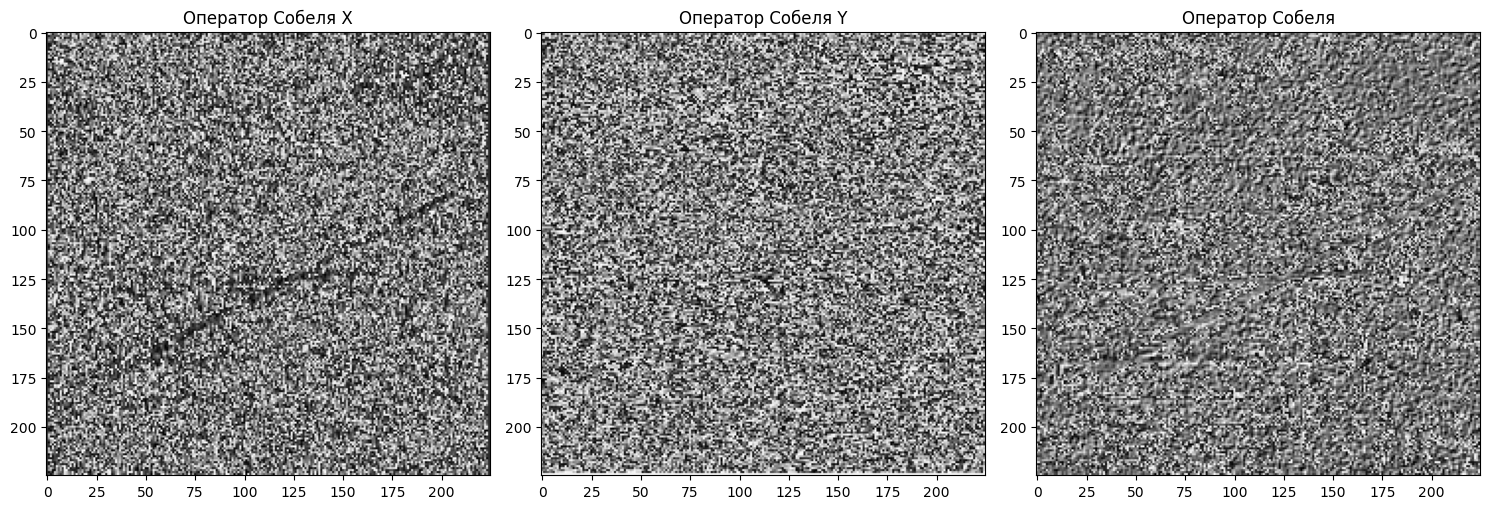

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow((grad_x - grad_x.min()) * 255, cmap="gray")
axs[0].set_title("Оператор Собеля X")
axs[1].imshow((grad_y - grad_y.min()) * 255, cmap="gray")
axs[1].set_title("Оператор Собеля Y")
axs[2].imshow((grad - grad.min()) * 255, cmap="gray")
axs[2].set_title("Оператор Собеля")
plt.tight_layout()
plt.show()

In [12]:
edges = cv2.Canny(image_gray,100,200)

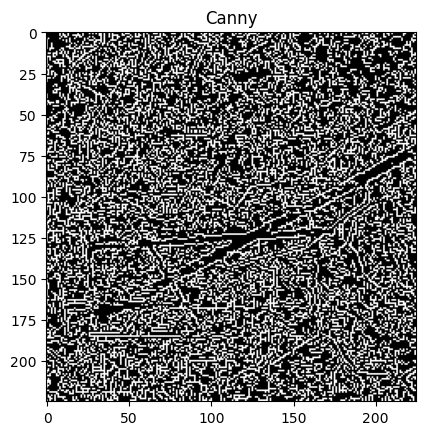

In [13]:
plt.imshow(edges, cmap="gray")
plt.title("Canny")
plt.show()

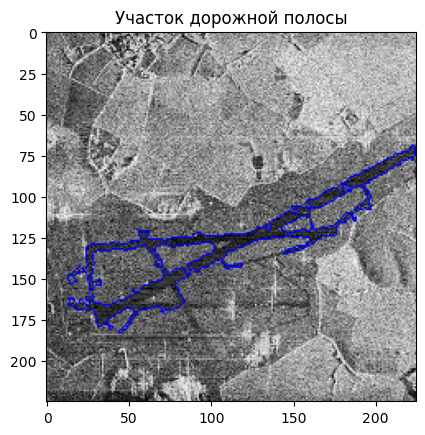

In [14]:
blur = cv2.GaussianBlur(bin_img, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
line_image = image.copy()
if contours:
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            cv2.drawContours(line_image, [contour], -1, (0, 0, 255), 1)
plt.imshow(line_image, cmap="gray")
plt.title("Участок дорожной полосы")
plt.show()